In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
encoding='utf-8'

# Import our input dataset
NFL_QB_df = pd.read_csv("Starter_2.csv")


In [2]:
NFL_QB_df

,Height_in,Weight_lbs,Wonderlic,40_Yard,Bench_Press,Vert_Leap _in,Broad Jump _in,Shuttle,3Cone,Started
0,72.00,211,NaN,4.65,NaN,32.5,115.0,4.20,7.00,No
1,72.25,210,NaN,4.96,NaN,30.0,114.0,4.60,7.34,No
2,76.50,225,NaN,5.11,NaN,27.5,103.0,4.75,NaN,No
3,73.13,220,NaN,4.84,NaN,36.5,114.0,4.44,7.15,No
4,74.75,227,NaN,4.46,NaN,NaN,119.0,NaN,NaN,Yes
...,...,...,...,...,...,...,...,...,...,...
722,75.60,207,NaN,5.15,6.0,26.5,104.0,4.63,NaN,No
723,75.00,212,NaN,4.95,NaN,28.0,108.0,4.51,NaN,Yes
724,71.30,187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
725,76.30,213,NaN,4.75,13.0,NaN,NaN,NaN,NaN,Yes


In [3]:
#NFL_QB_df = NFL_QB_df.dropna()
#NFL_QB_df.dropna(('Wonderlic','40 Yard','Bench Press','Vert Leap','Broad Jump','Shuttle','3Cone','Started'), inplace=True)
NFL_QB_df = NFL_QB_df.drop(['Bench_Press'],axis=1)

In [4]:
NFL_QB_df = NFL_QB_df.dropna()


In [5]:
NFL_binary= pd.get_dummies(NFL_QB_df.Started, prefix='Started').iloc[:,1:]
NFL_Stats_df = pd.concat([NFL_QB_df, NFL_binary], axis=1)


In [6]:
NFL_Stats_df = NFL_Stats_df.loc[:,~NFL_Stats_df.columns.duplicated()] 
NFL_Stats_df = NFL_Stats_df.drop(['Started'], axis = 1)
NFL_Stats_df

,Height_in,Weight_lbs,Wonderlic,40_Yard,Vert_Leap _in,Broad Jump _in,Shuttle,3Cone,Started_Yes
109,75.25,216,29.0,4.64,33.0,122.0,4.31,6.75,1
119,76.13,233,28.0,4.83,30.5,107.0,4.53,7.40,1
125,74.13,225,24.0,4.80,30.0,114.0,4.08,6.88,1
128,74.63,226,33.0,4.82,31.0,110.0,4.31,7.14,1
134,74.13,222,25.0,4.67,27.5,116.0,4.25,6.87,1
...,...,...,...,...,...,...,...,...,...
504,74.30,223,14.0,4.64,33.0,116.0,4.38,7.30,1
505,72.90,213,28.0,4.76,33.5,108.0,4.28,7.27,1
506,74.80,227,26.0,4.70,34.0,111.0,4.29,6.99,1
507,74.40,226,12.0,5.14,30.5,106.0,4.51,7.50,0


In [7]:
X = NFL_Stats_df.to_numpy()
X

array([[ 75.25, 216.  ,  29.  , ...,   4.31,   6.75,   1.  ],
       [ 76.13, 233.  ,  28.  , ...,   4.53,   7.4 ,   1.  ],
       [ 74.13, 225.  ,  24.  , ...,   4.08,   6.88,   1.  ],
       ...,
       [ 74.8 , 227.  ,  26.  , ...,   4.29,   6.99,   1.  ],
       [ 74.4 , 226.  ,  12.  , ...,   4.51,   7.5 ,   0.  ],
       [ 73.4 , 195.  ,  16.  , ...,   4.35,   7.45,   0.  ]])

In [8]:
y = NFL_Stats_df['Started_Yes']
y = y.to_numpy()
y

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0], dtype=uint8)

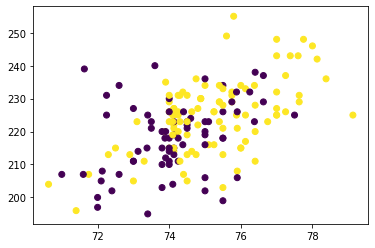

In [9]:
# Visualizing both classes
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
scaler = StandardScaler().fit(X_train)
X_selected_train_scaled = scaler.transform(X_train)
X_selected_test_scaled = scaler.transform(X_test)

In [12]:
#Create standscaler() model and fit it to the training data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

In [13]:
# Transform the training and testing data by using X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [14]:
# Fit random forest and get training and testing score
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 1.0


In [15]:
#NFLQB = pd.Dataframe(Starter_2.data, columns=Starter_2.features_names)
df = pd.read_csv("Starter_2.csv")
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(inplace=True)
        
X = NFL_Stats_df.drop('Started_Yes', axis=1)
y = NFL_Stats_df['Started_Yes'] != 1

In [16]:
feature_importances = clf.feature_importances_

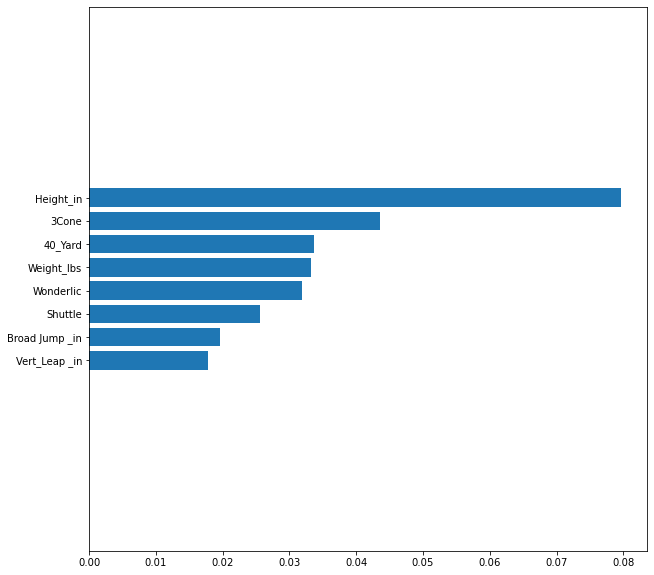

In [17]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,10)
plt.margins(y=1)

ax.barh(y=cols, width=width)

plt.show()

In [18]:
# Get feature importance
features = clf.feature_importances_
features = sorted(features, reverse=True)
features

[0.7151269492143866,
 0.07957369515989271,
 0.04359549021470669,
 0.03361032059100218,
 0.03318294459483673,
 0.03191860010958013,
 0.02557637337009443,
 0.019675761241299557,
 0.017739865504200966]

k: 1, Train/Test Score: 1.000/0.977
k: 3, Train/Test Score: 0.992/1.000
k: 5, Train/Test Score: 0.992/1.000
k: 7, Train/Test Score: 0.992/1.000
k: 9, Train/Test Score: 0.992/1.000
k: 11, Train/Test Score: 0.992/1.000
k: 13, Train/Test Score: 0.992/1.000
k: 15, Train/Test Score: 0.992/1.000
k: 17, Train/Test Score: 0.984/1.000
k: 19, Train/Test Score: 0.984/1.000


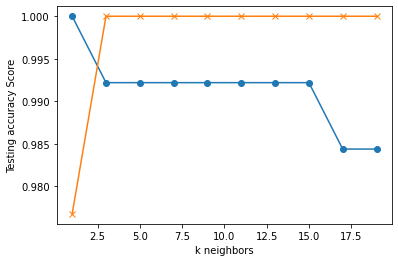

In [19]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [20]:
# Note that k: 5 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=5 Test Acc: 1.000


In [21]:
knn.predict(X_test_scaled[0:10])

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 1], dtype=uint8)

In [22]:
knn.predict_proba(X_test_scaled[0:10])

array([[1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.4, 0.6]])

In [23]:
from sklearn.metrics import roc_curve

In [24]:
y_pred_proba = knn.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [25]:
# from sklearn.metrics import auc
# from sklearn.metrics import roc_auc_score
# plt.figure()
# plt.plot(fpr, tpr, color='darkorange',
#  #   label=f'ROC curve (area = {roc_auc:0.2f})')
# plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic example')
# plt.legend(loc="lower right")
# plt.show()

In [26]:

# roc_auc = auc(fpr, tpr)
# roc_auc

In [27]:
# Create the model and fit the model to the data

from sklearn.linear_model import LogisticRegression

NFL = LogisticRegression()

In [28]:
NFL.fit(X_train, y_train)


C:\Users\jagde\anaconda33\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
#Accuracy score for test data
NFL.score (X_test, y_test)


1.0

In [30]:
print('Weight coefficients: ', NFL.coef_)
print('y-axis intercept: ', NFL.intercept_)

Weight coefficients:  [[ 1.08649406e-02  1.44969307e-02  2.73001771e-02 -4.34305357e-01
  -1.64207777e-02 -3.81486980e-03 -1.08169189e-01 -4.76124427e-01
   4.82316980e+00]]
y-axis intercept:  [-0.08282163]


In [31]:
NFL.fit(X_train, y_train)
training_score = NFL.score(X_train, y_train)
testing_score = NFL.score(X_test, y_test)
 
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 1.0
Testing Score: 1.0


C:\Users\jagde\anaconda33\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
#Make predictions
# Generate a new data point (the red circle)
# import numpy as np
# new_data = np.array([[-2, 6]])
# plt.scatter(X[:, 0], X[:, 1], c=y)
# plt.scatter(new_data[0, 0], new_data[0, 1], c="r", marker="o", s=100)

In [33]:
#Make predictions
#print(f'Actual:\t\t{list(y_test[:10])}')
#print(f'Predicted:\t{list(NFL.predict(X_test[:10]))}')

#predictions = NFL.predict(X_test)
#pd.DataFrame({"Prediction": predictions, "Actual": y_test})

predictions = NFL.predict(X_test)
print(f"First 10 predictions:   {predictions[:10]}")
print(f"First 10 actual labels: {y_test[:10].tolist()}")


First 10 predictions:   [0 1 1 0 0 0 1 1 0 1]
First 10 actual labels: [0, 1, 1, 0, 0, 0, 1, 1, 0, 1]


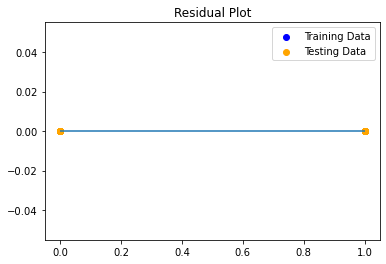

In [34]:
# Plot the residuals for the training and testing data.

%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(NFL.predict(X_train), NFL.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(NFL.predict(X_test), NFL.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show()

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
y_true = y_test
y_pred = NFL.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[16,  0],
       [ 0, 27]], dtype=int64)

In [36]:
tn, fp, fn, tp = cm.ravel()

In [37]:
# Calculate the precision of the model based on the confusion matrix
precision = tp / (tp + fp)
precision

1.0

In [38]:
# Calculate the sensitivity of the model based on the confusion matrix
sensitivity = tp / (tp + fn)
sensitivity

1.0

In [39]:
f1 = 2*precision*sensitivity / (precision + sensitivity)
f1

1.0

In [40]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        27

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



In [41]:
# from sklearn.ensemble import RandomForestClassifier
# # Fit random forest and get training and testing score
# clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
# print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
# print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

In [42]:
# Use SelectFromModel to only get the important features
from sklearn.feature_selection import SelectFromModel

# create selection object by passing in the model fitted above
# Note, the original model MUST be one that has a feature_importances_ or coef_
sel = SelectFromModel(clf)

In [43]:
# Fit selection object to the training set
sel.fit(X_train_scaled, y_train)

# Displays an array indicating whether given feature is important
sel.get_support()

array([False, False, False, False, False, False, False, False,  True])

In [44]:
# Retrain entire model on just selected features by transforming features
# Using the sklearn selection object
# X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)

# # Scale the data
# scaler = StandardScaler().fit(X_selected_train)
# X_selected_train_scaled = scaler.transform(X_selected_train)
# X_selected_test_scaled = scaler.transform(X_selected_test)

In [45]:
# Let's see how logistic regression does with the non-selected dataset
clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 1.0


In [46]:
# Now let's see it with selected dataset
clf = LogisticRegression()
clf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 1.0


In [47]:
# Prepare the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
# Fit a model, and then print a classification report
clf = RandomForestClassifier(random_state=1).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

              precision    recall  f1-score   support

       False       0.66      0.91      0.76        23
        True       0.82      0.45      0.58        20

    accuracy                           0.70        43
   macro avg       0.74      0.68      0.67        43
weighted avg       0.73      0.70      0.68        43

Training Score: 1.0
Testing Score: 0.6976744186046512


In [49]:
# Import an Extremely Random Trees classifier
from sklearn.ensemble import ExtraTreesClassifier

In [50]:
clf = ExtraTreesClassifier(random_state=1).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred,))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

              precision    recall  f1-score   support

       False       0.64      0.91      0.75        23
        True       0.80      0.40      0.53        20

    accuracy                           0.67        43
   macro avg       0.72      0.66      0.64        43
weighted avg       0.71      0.67      0.65        43

Training Score: 1.0
Testing Score: 0.6744186046511628


In [51]:
# Import an Adaptive Boosting classifier
from sklearn.ensemble import AdaBoostClassifier

In [52]:
clf = AdaBoostClassifier(random_state=1).fit(X_train_scaled, y_train)
print(classification_report(y_test, y_pred,))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

              precision    recall  f1-score   support

       False       0.64      0.91      0.75        23
        True       0.80      0.40      0.53        20

    accuracy                           0.67        43
   macro avg       0.72      0.66      0.64        43
weighted avg       0.71      0.67      0.65        43

Training Score: 0.9765625
Testing Score: 0.627906976744186
